In [1]:
print("Jai Mahakaal 🕉️")

Jai Mahakaal 🕉️


In [2]:
print("36 biradari bhaichara jindabad 💪")

36 biradari bhaichara jindabad 💪


# 2. Perform KNN from scratch and with the library and plot the results. Use random generated datapoints and make_blobs dataset of sklearn.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from statistics import mode
from sklearn import datasets

In [3]:
x,y=datasets.make_blobs(n_samples=500, centers=None, n_features=2,random_state=0)


In [4]:
df=pd.DataFrame(x,columns=["Feature1","Feature2"])
data=df.copy()
data["Target"]=y
data.head()

,Feature1,Feature2,Target
0,1.103182,4.705777,0
1,-1.932846,3.642251,2
2,-2.034422,1.866002,2
3,1.616402,2.686831,0
4,-0.960010,4.492566,0


In [5]:
def knn(point,data):
    distance=[]
    for i in data:
        sumn=0
        for j in range(len(data[0])):
            sumn+=(i[j]-point[j])**2
        distance.append(np.sqrt(sumn))
    return distance

dis=knn((0,0),x)
data1=data.copy()
data1["Distance"]=dis
data1.sort_values('Distance',inplace=True)
data1.head(10)


,Feature1,Feature2,Target,Distance
280,0.109564,-0.015120,1,0.110603
205,-0.200297,-0.124843,1,0.236018
482,0.103463,0.237772,1,0.259307
105,0.038861,0.358209,1,0.360311
212,0.374049,0.008692,1,0.374150
335,0.212198,0.419690,1,0.470284
211,0.312911,-0.405579,1,0.512258
471,0.649305,0.307606,1,0.718483
206,0.707342,0.136090,1,0.720315
438,0.422633,-0.670104,1,0.792249


In [6]:
k=9
a=data1["Target"][:k].values
print("Class : ",mode(a))

Class :  1


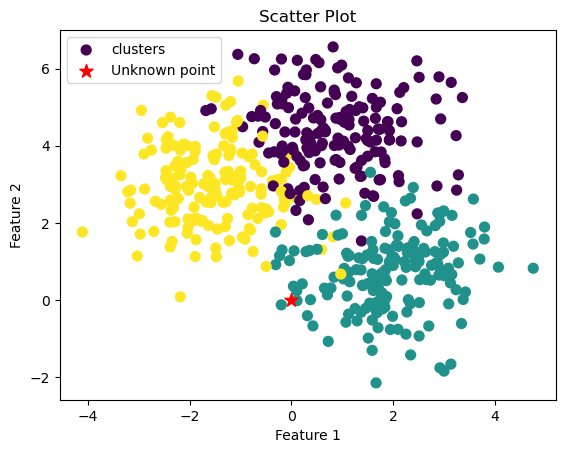

In [7]:
plt.title("Scatter Plot")
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis', s=50)
plt.scatter(0,0,marker="*",color="red",s=100,label="Unknown point")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(("clusters","Unknown point"))
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [9]:
error_rate=[]
for i in range(1,10):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    prediction=k.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))
    

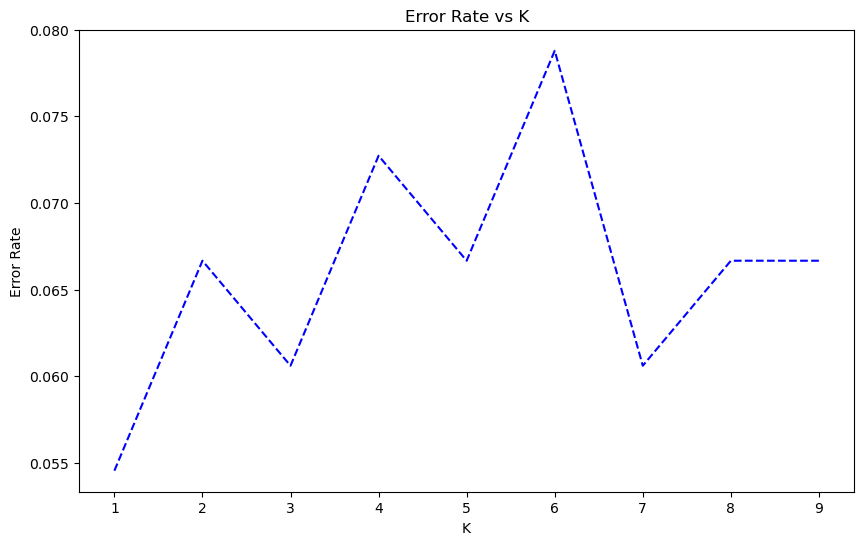

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed')
plt.title("Error Rate vs K")
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

1.0


In [ ]:
#knn by function 

In [11]:
k=KNeighborsClassifier(n_neighbors=7)
k.fit(X_train,y_train)
prediction=k.predict(X_test)

In [12]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.93      1.00      0.97        56
           2       0.98      0.90      0.94        58

    accuracy                           0.94       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.94      0.94      0.94       165



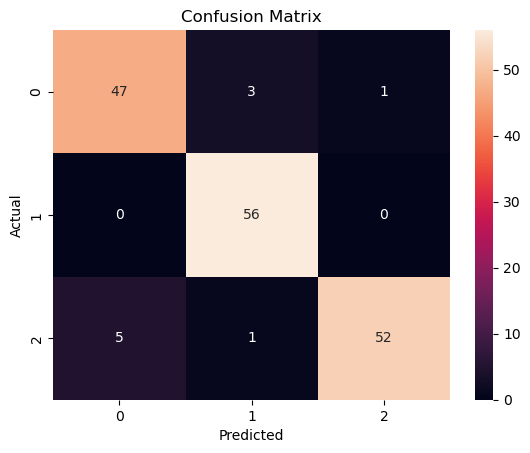

In [13]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
accuracy=accuracy_score(y_test,prediction)
print("accuracy : ",accuracy)

accuracy :  0.9393939393939394
